# Dados e Aprendizagem Automática
### Part VII

### Imports and installations

In [23]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import shap

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
%matplotlib inline

## FE and EDA on Titanic Dataset

Load the CSV - *Titanic*

In [24]:
df = pd.read_csv("titanic.csv")

Inspect data

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Plot the distribution of *Age*, *SibSp*, *Parch*, and *Fare*

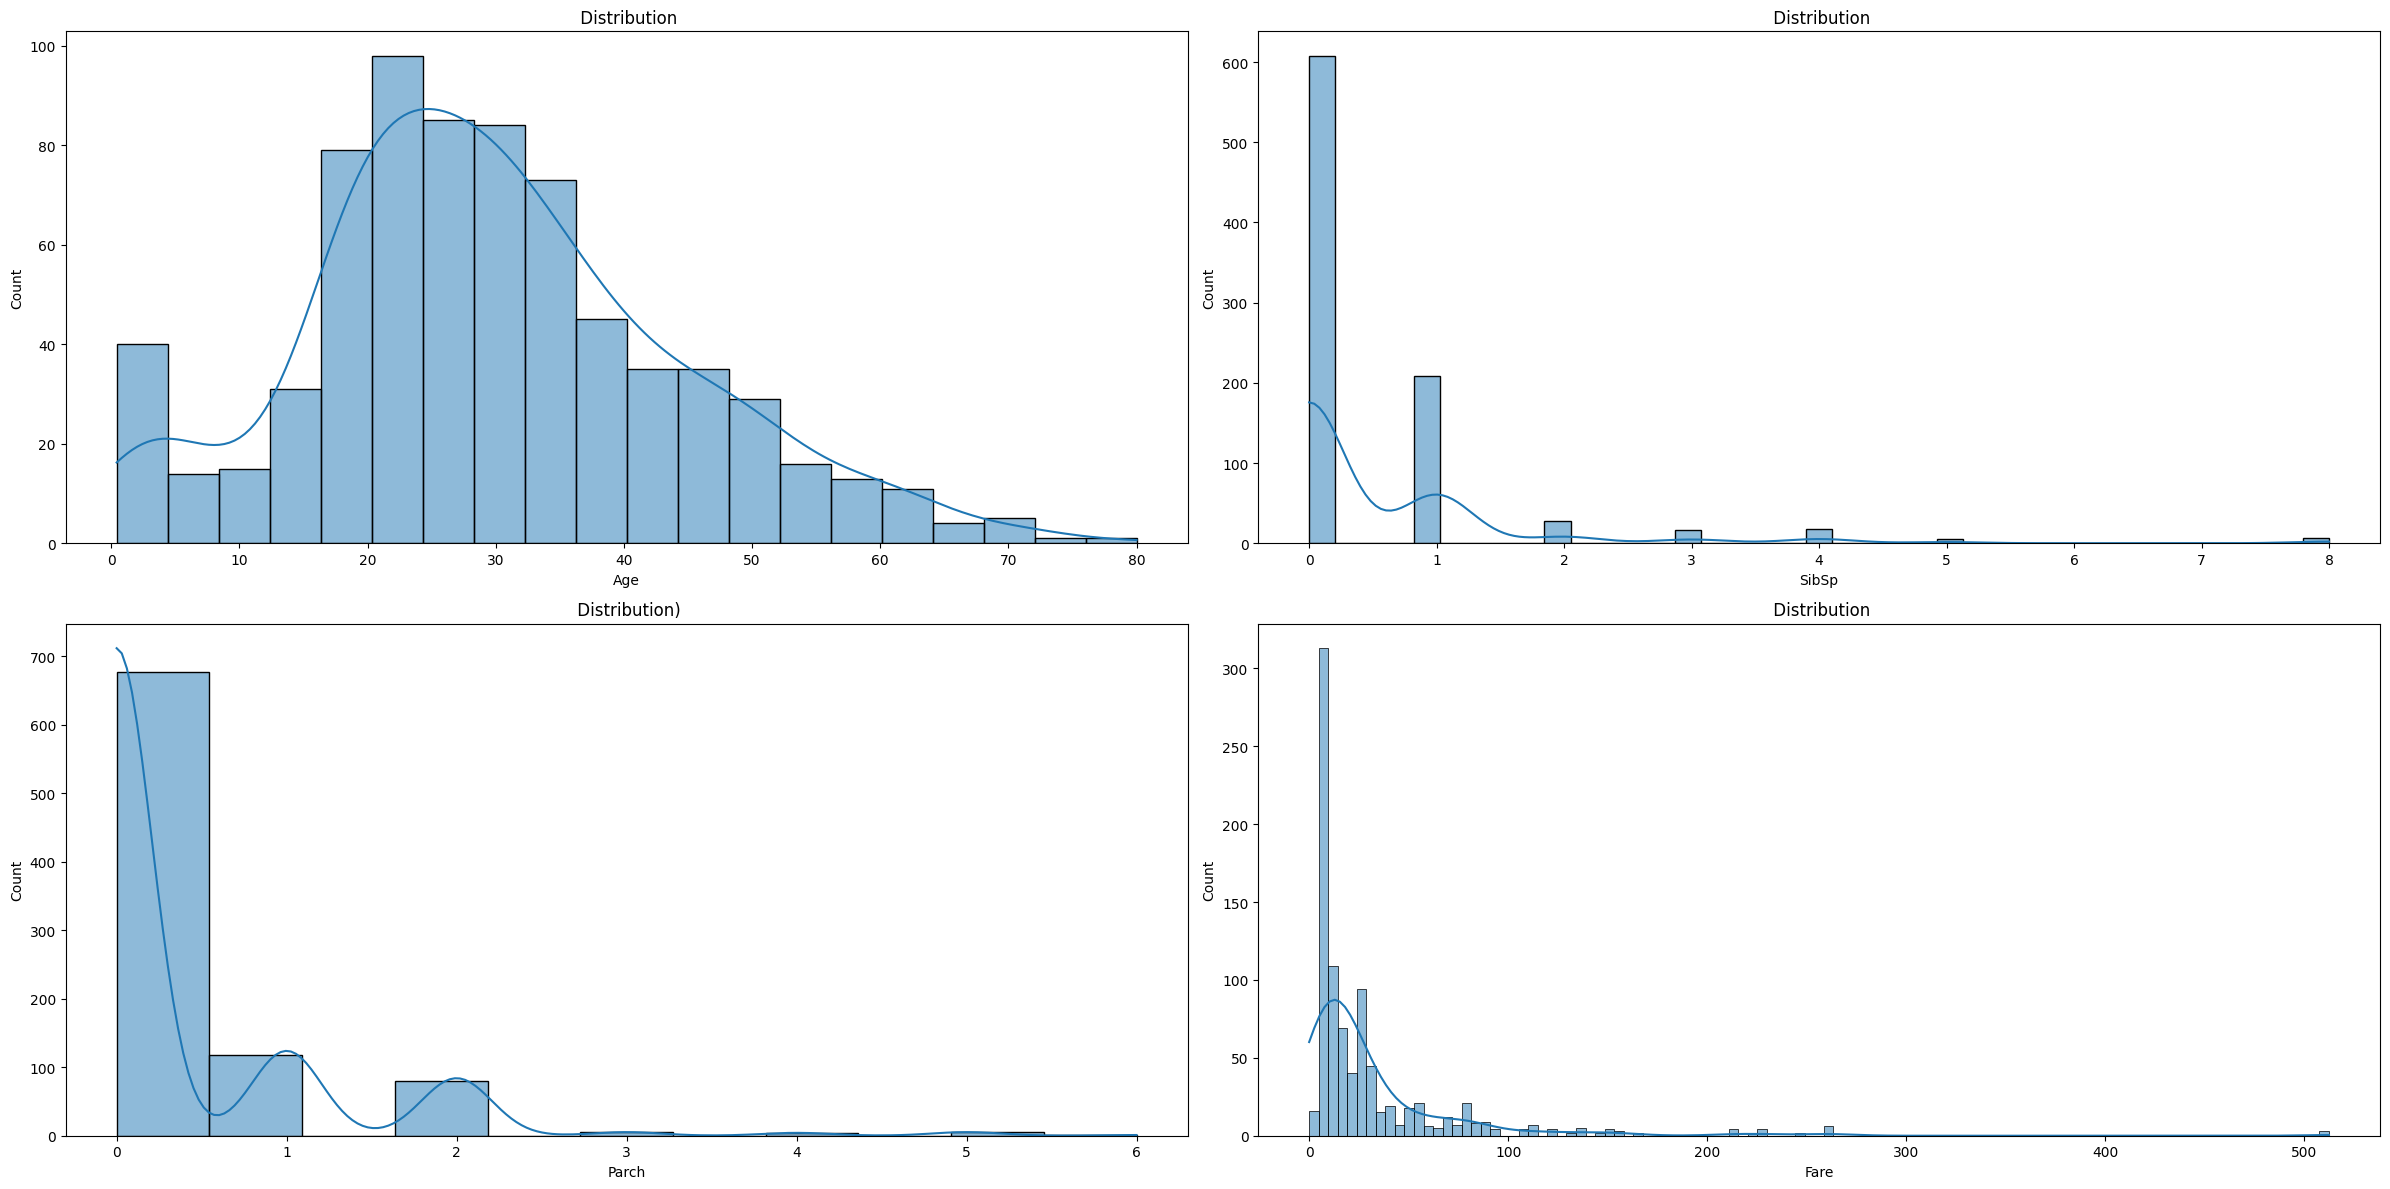

In [27]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(24, 12))

# Age Distribution
sns.histplot(data=df, x='Age', kde=True, ax=axes[0, 0])
axes[0, 0].set_title(' Distribution')

# SibSp Distribution
sns.histplot(data=df, x='SibSp', kde=True, ax=axes[0, 1])
axes[0, 1].set_title(' Distribution')

# Parch Distribution
sns.histplot(data=df, x='Parch', kde=True, ax=axes[1, 0])
axes[1, 0].set_title(' Distribution)')

# Fare Distribution
sns.histplot(data=df, x='Fare', kde=True, ax=axes[1, 1])
axes[1, 1].set_title(' Distribution')

plt.tight_layout()
plt.show()

- ***Age* Distribution:** normally distributed with some outliers towards older ages

- ***SibSp* Distribution:** skewed distribution with most values being 0 (indicating no siblings/spouses or parents/children onboard)

- ***Parch* Distribution:** skewed distribution with most of values being 0 (indicating no siblings/spouses or parents/children onboard)

- ***Fare* Distribution:** right-skewed distribution with some high values indicating expensive tickets

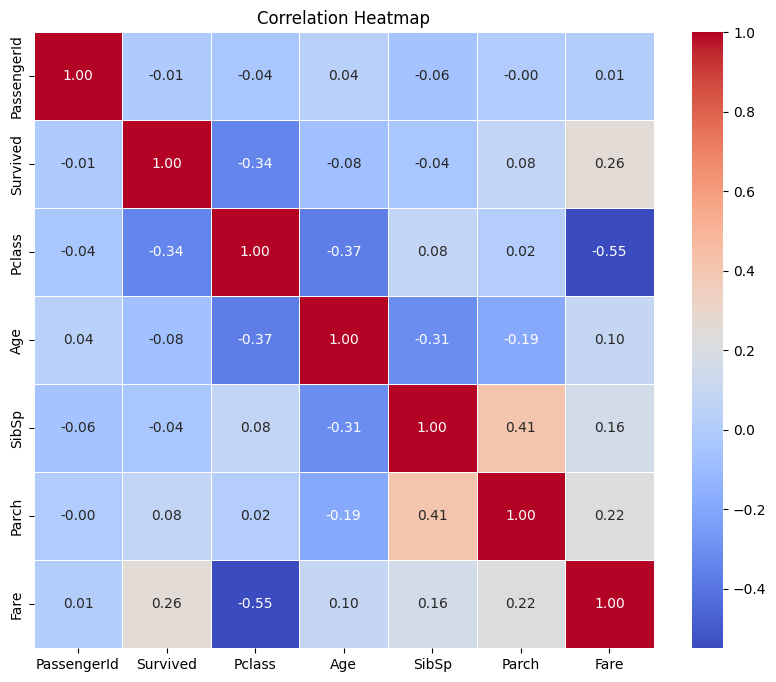

In [28]:
df2 = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
correlation_matrix = df2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Missing values

<Axes: >

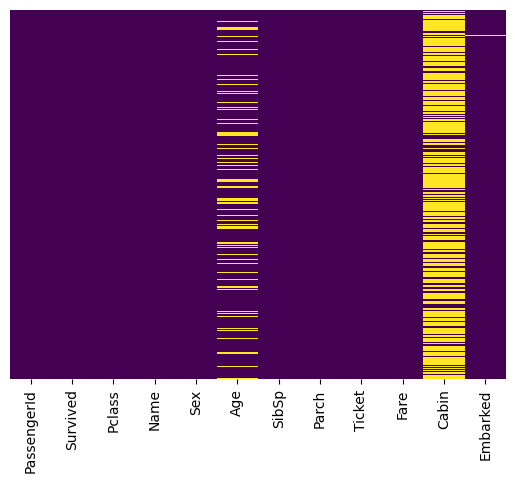

In [29]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [30]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*Age*, *Cabin* and *Embarked* have missing values

Feature *Age* - impute values using median

In [31]:
def med_impute_nan(df):
    med_impute = df.copy()
    med_impute["Age"] = med_impute["Age"].fillna(med_impute["Age"].median())
    return med_impute

In [32]:
med_impute = med_impute_nan(df)

In [33]:
med_impute.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
med_impute.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
# checking standard deviation
print(df['Age'].std())
print(med_impute['Age'].std())

14.526497332334044
13.019696550973194


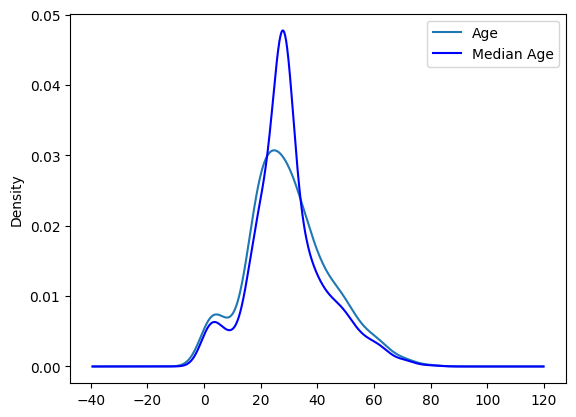

In [36]:
# plotting the variance difference
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
med_impute['Age'].plot(kind='kde', label='Median Age', ax=ax, color='blue')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [37]:
df = med_impute
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Feature *Embarked* - deal with NaN values

In [38]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [39]:
emabark = df['Embarked'].dropna()

In [40]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [41]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [42]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Feature *Cabin* - deal with NaN values

In [43]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
F2             3
C22 C26        3
              ..
C106           1
A19            1
D7             1
C118           1
E50            1
Name: count, Length: 147, dtype: int64

In [44]:
df['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [45]:
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)

In [46]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


Feature *Sex* - factorize: *male* = 1, *female* = 0

In [48]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,S


Features *Name*, *Ticket* and *Cabin* - drop

In [50]:
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

In [51]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


Feature *Embarked* - encode values: *S*, *C*, and *Q* using *LabelEncoder*

In [52]:
print(df["Embarked"].value_counts())

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [53]:
from sklearn.preprocessing import LabelEncoder
cols = ['Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


Correlation analysis of the features:

In [54]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Survived'].sort_values(ascending=False)
print("Correlation with target (Survived):\n", correlation_with_target)

Correlation with target (Survived):
 Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Embarked      -0.167675
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64


In this case, *Sex*, *Pclass*, and *Fare* have the highest absolute correlation values with *Survived*, suggesting that they may be useful for prediction.

Save dataset into a new file

In [55]:
# Convert data to DataFrame
t = pd.DataFrame(df)

# Specify the CSV file name
filename = "titanic_ds.csv"

# Save to CSV
t.to_csv(filename, index=False, encoding='utf-8')

## Random Forest Classifier

Data split

In [56]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)

Train the model

In [58]:
rf_model = RandomForestClassifier()

In [59]:
rf_model.fit(X_train,y_train )

RandomForestClassifier()

Accuracy of the model

In [60]:
rf_score = rf_model.score()
print("Accuracy: %.2f%%" % (rf_score * 100))

TypeError: ClassifierMixin.score() missing 2 required positional arguments: 'X' and 'y'

Save predictions to a file

In [ ]:
op_rf = rf_model.predict(X_test)

In [ ]:
op = pd.DataFrame(X_test['PassengerId'])
op['Survived'] = op_rf
op.to_csv("submission.csv", index=False)

## Feature Importance

Understanding which features influence predictions is fundamental. Feature importance analysis reveals the impact of factors like age, gender, and class on survival rates in theTitanic dataset.

### Random Forest Importance

In [ ]:
start_time = time.time()

rf_importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.034 seconds


In [ ]:
print("Random Forest Feature Importances:\n", )

Random Forest Feature Importances:
 [0.18221107 0.09430808 0.22985761 0.16936468 0.04614318 0.0369743
 0.21234619 0.02879489]


### FI based on Mean Decrease in Impurity (MDI)

Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

In [ ]:
start_time = time.time()

mdi_importances = pd.Series(rf_model.feature_importances_, index=X_test.columns)

elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.011 seconds


In [ ]:
print("Feature importances using MDI:\n", )

Feature importances using MDI:
 PassengerId    0.182211
Pclass         0.094308
Sex            0.229858
Age            0.169365
SibSp          0.046143
Parch          0.036974
Fare           0.212346
Embarked       0.028795
dtype: float64


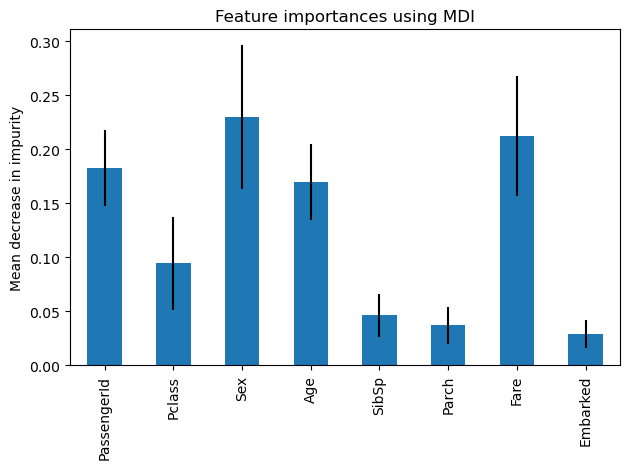

In [ ]:
fig, ax = plt.subplots()
mdi_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### FI based on Permutation Importance

Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set.

In [ ]:
start_time = time.time()

result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 1.241 seconds


In [ ]:
p_importances = pd.Series(result.importances_mean, index=X_test.columns)
print("Feature importances using PI:\n", )

Feature importances using PI:
 PassengerId    0.017910
Pclass         0.060448
Sex            0.167537
Age            0.027239
SibSp          0.010075
Parch          0.006716
Fare           0.052239
Embarked       0.009701
dtype: float64


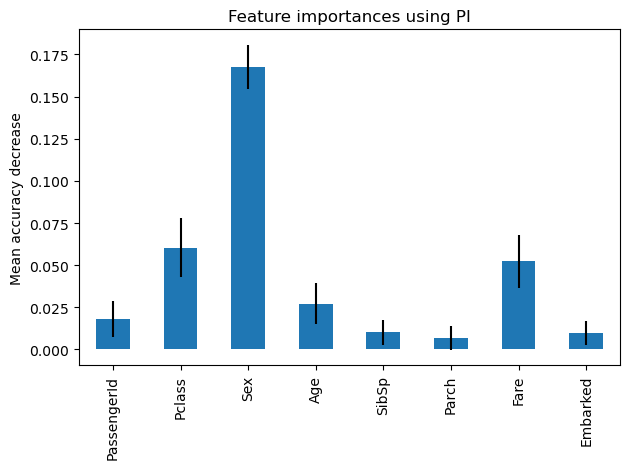

In [ ]:
fig, ax = plt.subplots()
p_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using PI")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### Which features have more importance?

Model specific vs. model agnostic

## SHAP (SHapley Additive exPlanations) Analysis

<code>pip install shap</code>

<code>conda install -c conda-forge shap</code>

In [ ]:
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer()
shap_values = explainer(X_test)

### Local Interpretability

Local interpretability can be explained using the Titanic dataset. Let’s understand why a specific passenger, *ID=0*, didn't survived.

C:\Users\filip\.conda\envs\pl3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


The passenger did not survive


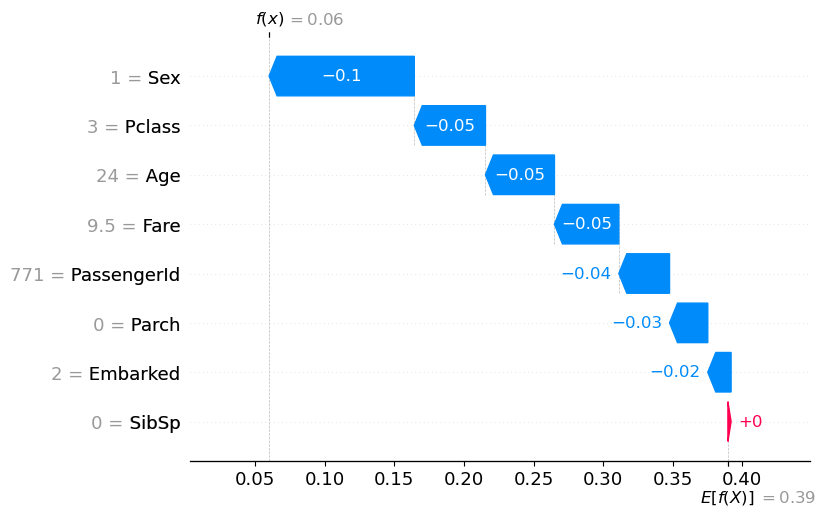

In [ ]:
no = 0 # change the number for a different passenger analysis
if rf_model.predict(np.expand_dims(X_test.iloc[no],axis=0))[0] == 1:
    print("The passenger survived")
else:
    print("The passenger did not survive")
shap.plots.waterfall(shap_values[no,:,1])

**Contribution of each feature to the survival of the passenger:**

*Negatively*:
- Sex = 1 – being male
- Fare = 9.5 – low fare
- Pclass = 3 – 3rd class
- Age = 24 – being young
- PassengerID = 771 – being among the last board the ship
- Parch = 0 – having no parent/children aboard
- Embarked = 2 – port of embarking 2

*Positively*:
- SibSp = 0 – having no siblings/spouse aboard

### Global Interpretability

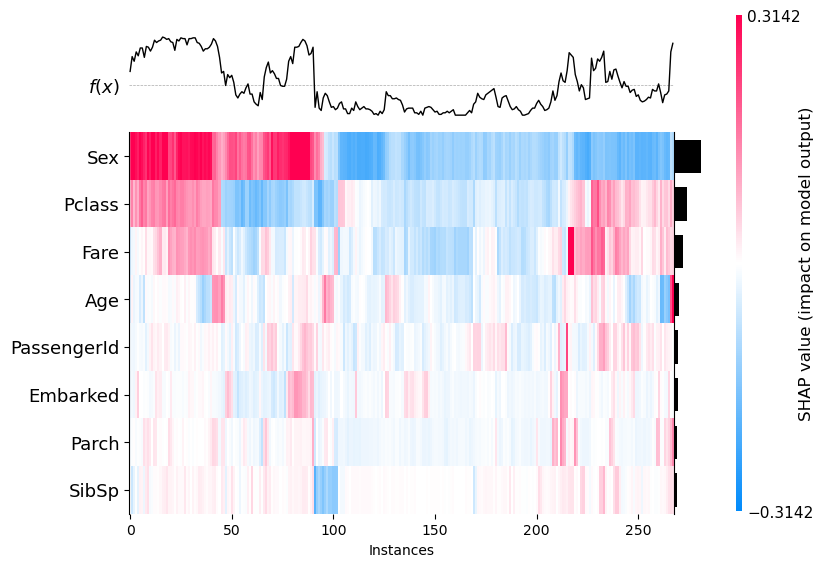

<Axes: xlabel='Instances'>

In [ ]:
shap.plots.scatter(shap_values[:,"Sex",1])

### SHAP Analysis - Feature wise

This tells us how each feature globally contributed to the model prediction.

**Sex**
- Being a male *(Sex=1)* reduced chances of survival. (Low SHAP Values)
- Being a female *(Sex=0)* increased chances of survival. (High SHAP Values)

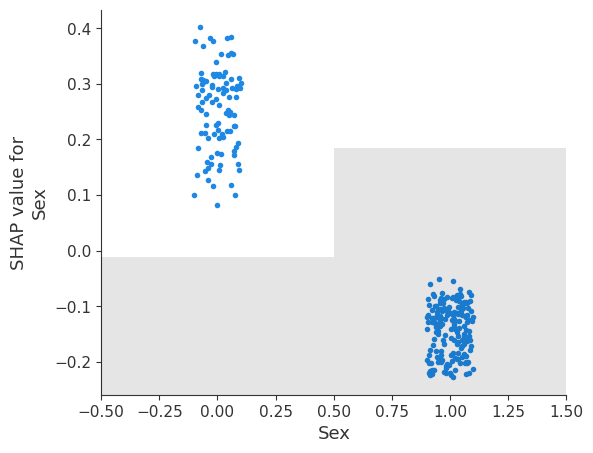

In [ ]:
shap.plots.scatter(shap_values[:,"Pclass",1])

**Pclass**
- Being in the 1st class contributed highly positively to the survival.
- Being in the 2nd class contributed slightly positively to the survival.
- Being in the 3rd class contributed negatively to the survival.

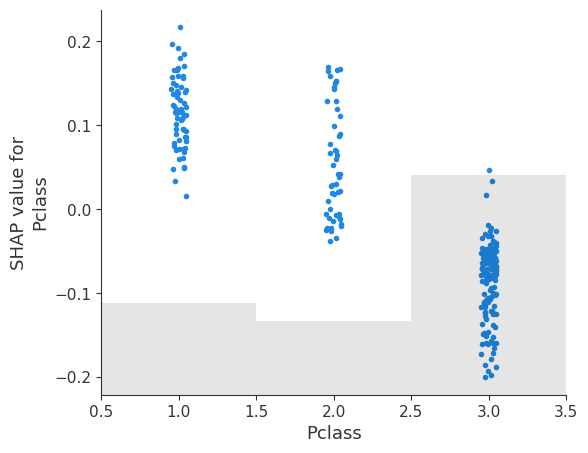

In [ ]:
shap.plots.scatter(shap_values[:,"Age",1])

**Age**
- Being a child below 10 years-old contributed highly towards survival.
- Being over 50 years-old contributed negatively to the survival.

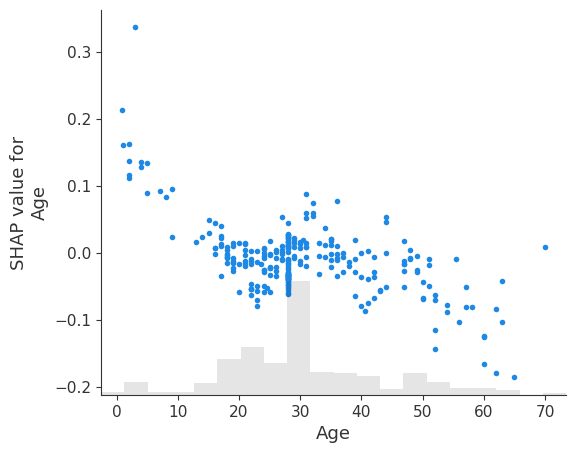

In [ ]:
shap.plots.scatter(shap_values[:,"Fare",1])

**Fare**
- A low fare contributes negatively towards survival.
- A high fare (above 70) contributed positively towards survival.

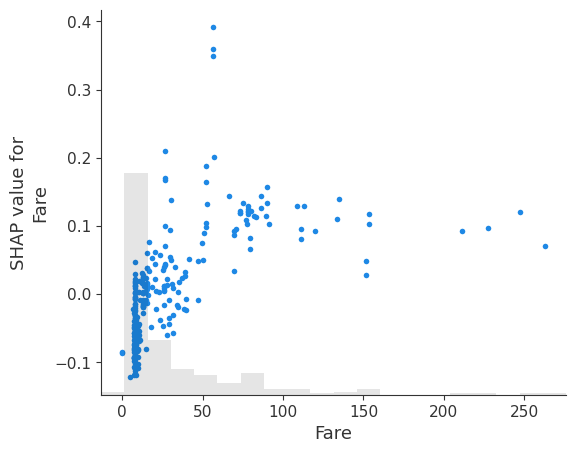

In [ ]:
shap.plots.scatter(shap_values[:,"Fare",1])

**SibSp** and **Parch**
- Higher sibling/spouse relation contributed negatively towards survival.
- Having zero or one sibling/spouse contributed positively towards survival.
- Having 1 or 2 parents/children contributed slightly positively towards survival.

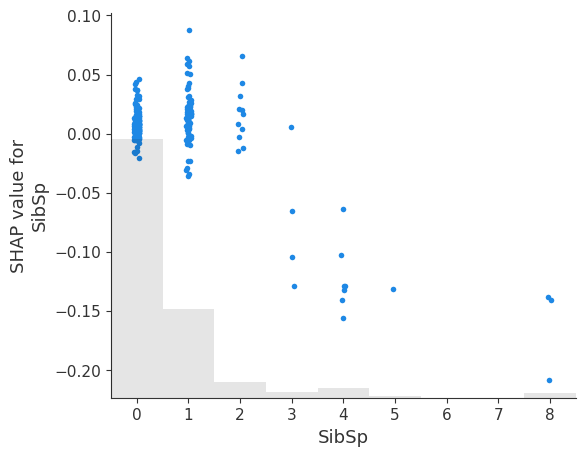

In [ ]:
shap.plots.scatter(shap_values[:,"SibSp",1])

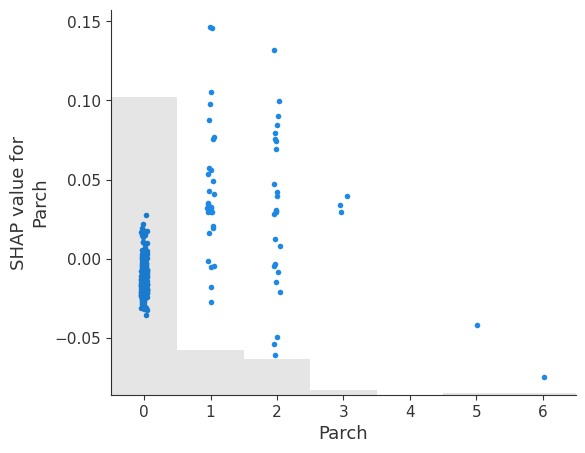

In [ ]:
shap.plots.scatter(shap_values[:,"Parch",1])

**Global interpretability** is vital for comprehending overall model behavior. Using **Partial Dependence Plots (PDPs)** with the Titanic dataset, we can visualize how changes in *SibSp* influence the model’s predictions.

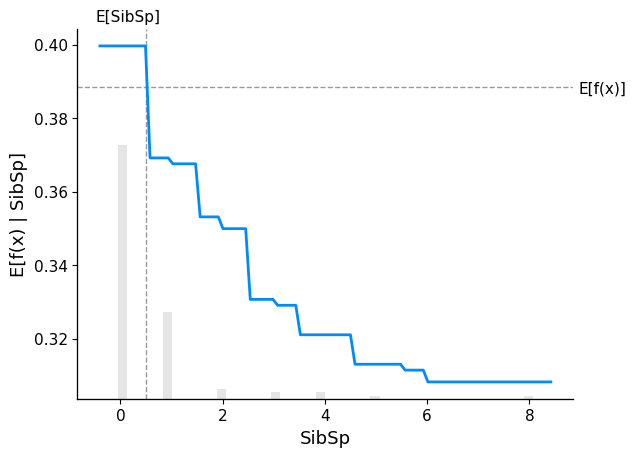

In [ ]:
shap.partial_dependence_plot("SibSp", rf_model.predict, X_train, ice=False, model_expected_value=True, feature_expected_value=True,)

## Linear Regression

In [ ]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
explainer = shap.LinearExplainer(lm, X_train,feature_perturbation="interventional")
shap_values = explainer.shap_values(X_train)

shap.force_plot(explainer.expected_value, shap_values[0,:],X_train.iloc[0,:])



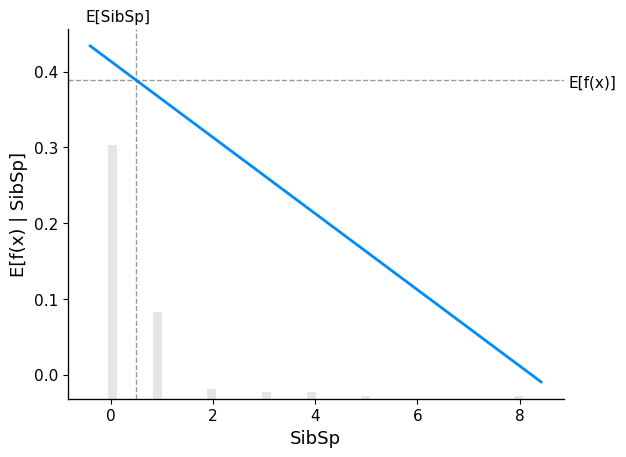

In [ ]:
shap.partial_dependence_plot("SibSp", lm.predict, X_train, ice=False, 
                             model_expected_value=True, feature_expected_value=True,)

For one passenger:

In [ ]:
shap.force_plot(explainer., shap_values[0,:], X_test.iloc[0,:])

For all training data set:

In [ ]:
explainer_Shap = shap.LinearExplainer(model=lm, masker=X_train)
shap_values = explainer_Shap.shap_values(X_train)

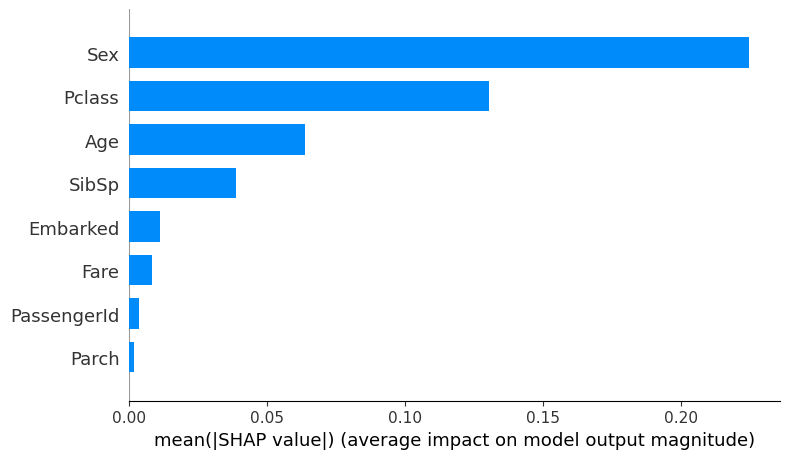

In [ ]:
shap.summary_plot(shap_values,X_train,plot_type="bar")

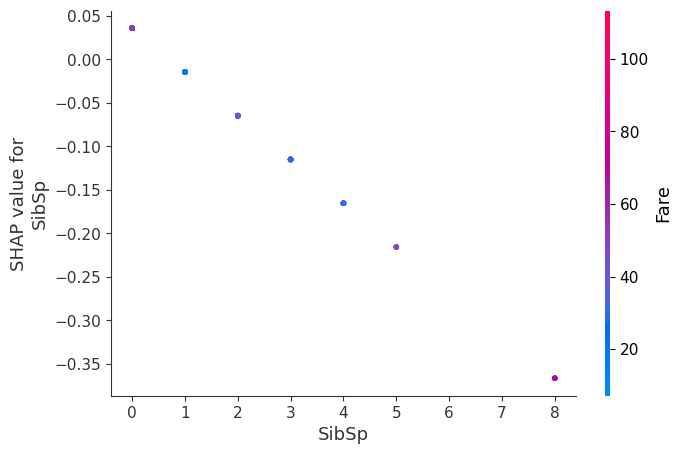

In [ ]:
shap.dependence_plot("SibSp", shap_values, X_train)